# Impact of External Factors on Rides

You are working as an analyst for Zuber, a new ride-sharing company being launched in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.

Working with a database, you will analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.

After getting and combining data with SQL we will use now Python to study more these data and do our analysis

## Exploratory Data Analysis (EDA) in Python

### Initialization

In [17]:
# Load the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

### Load Data

In [18]:
# Laod trip data for each company between between 15 and 16 November 2017
trips_df = pd.read_csv("/datasets/project_sql_result_01.csv")
print(trips_df)

                       company_name  trips_amount
0                         Flash Cab         19558
1         Taxi Affiliation Services         11422
2                 Medallion Leasing         10367
3                        Yellow Cab          9888
4   Taxi Affiliation Service Yellow          9299
..                              ...           ...
59     4053 - 40193 Adwar H. Nikola             7
60          2733 - 74600 Benny Jona             7
61    5874 - 73628 Sergey Cab Corp.             5
62       2241 - 44667 - Felman Corp             3
63      3556 - 36214 RC Andrews Cab             2

[64 rows x 2 columns]


In [19]:
# Print the general information about the DataFrame of the trips
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


As we can see the trips dataframe consist of 2 columns (with 64 non-null entries) stating the name of the taxi company and the trips amount done by each company.

Each column has the correct data type:

company_name contains string data with object data type

trips_amount contains numbers data with int64 data type

In [20]:
# Laod dropoff_location data for each trip
dropoff_location_df = pd.read_csv("/datasets/project_sql_result_04.csv")
print(dropoff_location_df)

   dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..                   ...            ...
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800000

[94 rows x 2 columns]


In [21]:
# Print the general information about the DataFrame of the dropoff_locations
dropoff_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


As we can see the trips dataframe consist of 2 columns (with 94 non-null entries) stating the name of dropoff_location and the average trips amount done to this locations.

Each column has the correct data type

dropoff_location_name contains string data with object data type

average_trips contains numbers data with float64 data type

### Check for duplicate

We can check for duplicate data and remove it to make our analysis more clear

No duplicates were found

In [22]:
trips_df.duplicated() # checking for duplicates
trips_df['company_name'].nunique() # taxi company names are unique

64

In [23]:
dropoff_location_df.duplicated() # checking for duplicates
dropoff_location_df['dropoff_location_name'].nunique() # dropoff_location names are unique

94

### Identify the top 10 neighborhoods in terms of destinations

In [24]:
#sorting the value according to the average of trips in descending order and selecting the first 10
top10_dropoff_locations = dropoff_location_df.sort_values('average_trips', ascending = False).head(10)
top10_dropoff_locations

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Plot Graphs

Taxi Companies Name and Number of Rides

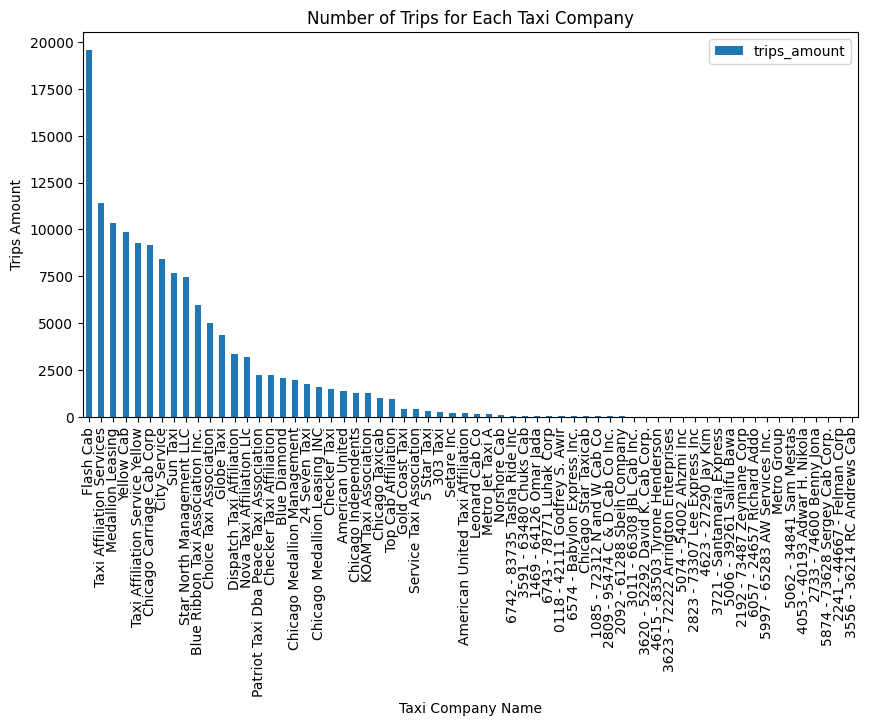

In [25]:
trips_df.plot(kind='bar', x='company_name', y='trips_amount',
                       xlabel='Taxi Company Name', ylabel='Trips Amount',
                       title='Number of Trips for Each Taxi Company', rot=90,
                       figsize=(10, 5))
plt.show()

 Top 10 Neighborhoods in Terms of Destinations

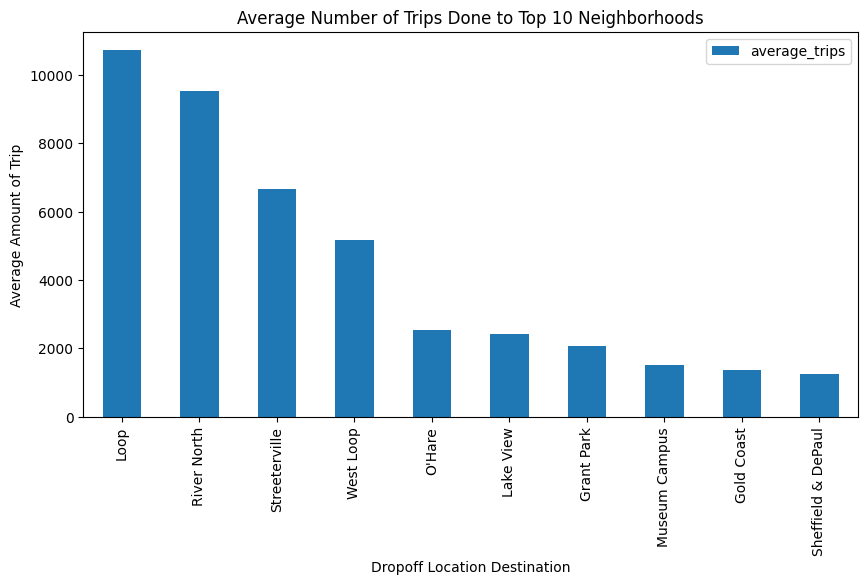

In [26]:
top10_dropoff_locations.plot(kind='bar', x='dropoff_location_name', y='average_trips',
                       xlabel='Dropoff Location Destination', ylabel='Average Amount of Trip',
                       title='Average Number of Trips Done to Top 10 Neighborhoods', rot=90,
                       figsize=(10, 5))
plt.show()

###### For the Number of Trips for Each Taxi Company:

Flash Cab leads all taxi companies in the number of trips, making it the most popular or frequently used taxi service in Chicago during the specified period.

Taxi Affiliation Services and Medallion Leasin also have a significant number of trips, ranking just behind Flash Cab in terms of popularity.

There is a notable drop in the number of trips from the top companies to others, highlighting a significant disparity in usage between the leading companies and the rest. Most of the listed companies have relatively few trips compared to the top companies.

We can conclude that the taxi service market in Chicago seems to be dominated by a few key players, with Flash Cab leading significantly.

The steep decline suggests that passengers prefer certain companies over others, possibly due to factors like service quality, availability, or brand reputation. Smaller companies or those with fewer trips might need to improve their service offerings or marketing strategies to compete with the top players.

###### For Average Number of Trips to Top 10 Neighborhoods

Loop has the highest average number of trips, making it the most frequent drop-off location. River North and Streeterville also rank high as popular drop-off spots with a significant number of trips.

West Loop and O'Hare experience moderate trip numbers, reflecting considerable but less frequent activity compared to the top three.

Areas such as Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & DePaul have lower average trip numbers, indicating less frequent taxi activity in these locations.

We can conclude that the Loop is a major hub for taxi drop-offs, maybe due to its central location and the presence of many businesses and attractions.

River North and Streeterville are also key areas, possibly due to their nightlife, dining, and shopping options.

The presence of O'Hare in the list is due to a significant number of trips to the airport.

The lower average trips for other neighborhoods suggest these areas might be more residential or less frequented by taxi services.

## Statistical Hypothesis Test

Test Hypothesis that the average duration of trips from the Loop to O'Hare International Airport changes on rainy Saturdays.

We can formulate the following null and alternative hypotheses:

Null Hypothesis (H0): The average duration of trips from the Loop to O'Hare International Airport on Saturdays are same on rainy and good days.

Alternative Hypothesis (H1): There is a difference in the average duration of trips from the Loop to O'Hare International Airport changes on rainy Saturdays.

As we have two different groups (Good and Bad Condition), we will perform a two-sample independent t-test with a significance level (alpha value) equals to 0.05 (5%) be compared with.

In [27]:
# Load data for trips from the Loop to O'Hare International Airport on Saturdays.
saturdays_trips = pd.read_csv("/datasets/project_sql_result_07.csv")
print(saturdays_trips)
saturdays_trips.info()

                 start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0
1067  2017-11-04 16:00:00                Bad            2834.0

[1068 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts  

In [28]:
# Filter data for trips on Saturdays into Good conditions group and Bad conditions group
good_cond_trips = saturdays_trips[saturdays_trips['weather_conditions'] == 'Good']
print(good_cond_trips)
bad_cond_trips = saturdays_trips[saturdays_trips['weather_conditions'] == 'Bad']
print(bad_cond_trips)

                 start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1062  2017-11-11 06:00:00               Good            1500.0
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0

[888 rows x 3 columns]
                 start_ts weather_conditions  duration_seconds
6     2017-11-04 16:00:00                Bad            2969.0
30    2017-11-18 12:00:00                Bad            1980.0
34    2017-11-04 17:00:00      

In [34]:
# Calculate the mean and standard deviation of the trip durations for both groups.
mean_good_cond = np.mean(good_cond_trips['duration_seconds'])
var_good_cond = np.var(good_cond_trips['duration_seconds'])

print("Average duration of trips from the Loop to O'Hare International Airport on Good Cond Saturdays:\n", mean_good_cond)
print("Variance of duration of trips from the Loop to O'Hare International Airport on Good Cond Saturdays:\n", var_good_cond)


mean_bad_cond = np.mean(bad_cond_trips['duration_seconds'])
var_bad_cond = np.var(bad_cond_trips['duration_seconds'])

print("Average duration of trips from the Loop to O'Hare International Airport on Bad Cond Saturdays:\n", mean_bad_cond)
print("Variance of duration of trips from the Loop to O'Hare International Airport on Bad Cond Saturdays:\n", var_bad_cond)


Average duration of trips from the Loop to O'Hare International Airport on Good Cond Saturdays:
 1999.6756756756756
Variance of duration of trips from the Loop to O'Hare International Airport on Good Cond Saturdays:
 575732.9308497686
Average duration of trips from the Loop to O'Hare International Airport on Bad Cond Saturdays:
 2427.2055555555557
Variance of duration of trips from the Loop to O'Hare International Airport on Bad Cond Saturdays:
 517403.56330246915


In [36]:
# Hypothesis test

alpha = 0.05

#test hypothesis that the average duration of trips from the Loop to O'Hare International Airport changes on rainy Saturdays
results = st.ttest_ind(good_cond_trips['duration_seconds'], bad_cond_trips['duration_seconds'], equal_var = False)

print('p-value:', results.pvalue) #print p-value

if (results.pvalue < alpha): # compare p-value with the significance level alpha
    print("Reject Null Hypothesis")
else:
    print("Cannot reject the Null Hypothesis")

p-value: 6.738994326108734e-12
Reject Null Hypothesis


After doing the test it has been confirmed that the average duration of trips from the Loop to O'Hare International Airport changes on Rainy (Bad conditions) Saturdays and are not same as Good conditions Saturdays.

We can see this by comparing the average on both groups Bad Conditons (2427.21) Good Conditions (1999.68)

We can conclude that trips from the Loop to O'Hare International Airport take longer on rainy Saturdays compared to non-rainy Saturdays. This is likely due to factors such as slower driving speeds, increased traffic congestion, and other delays caused by poor weather conditions.

Understanding that trips take longer during bad weather can help travelers and transportation planners make more informed decisions. Travelers might need to allocate more time for their trips to the airport on rainy days.

In addition, taxi companies can use this information to adjust their scheduling and resource allocation. For example, they might need more drivers on rainy Saturdays to accommodate the longer trip durations and maintain service levels.